# Libraries and versions

In [1]:
python_version = !python -V #version 3.7.9
import pandas as pd #version 1.2.4
import numpy as np #version 1.20.1
import seaborn as sns #version 0.11.0
import matplotlib as plt #version 3.3.3
from datetime import date as dt
from IPython.display import Image

In [2]:
print(f'Python version - {python_version[0][7:]}')
print(f'Pandas version - {pd.__version__}')
print(f'Numpy version - {np.__version__}')
print(f'Seaborn version - {sns.__version__}')
print(f'Matplotlib version - {plt.__version__}')

Python version - 3.7.9
Pandas version - 1.2.4
Numpy version - 1.20.1
Seaborn version - 0.11.0
Matplotlib version - 3.3.3


# Configurations

## Pandas

In [3]:
#apresentará 500 colunas e linhas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)

## Seaborn

In [4]:
sns.set_palette('inferno')
sns.set_style('darkgrid')

def configuration(graphic_object, title=None, xlabel=None, ylabel=None, colors=None):
    graphic_object.figure.set_size_inches(15,4)
    graphic_object.set_title(title, color=colors, fontsize=16)
    graphic_object.set_xlabel(xlabel, color=colors, fontsize=14)
    graphic_object.set_ylabel(ylabel, color=colors, fontsize=14)
    graphic_object = graphic_object

## Warnings

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Base

In [6]:
bvsp = pd.read_csv('BVSP.csv')
bvsp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0.0
1,1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0.0
2,1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0.0
3,1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0.0
4,1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0.0


### Informações

In [7]:
bvsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116 entries, 0 to 7115
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7116 non-null   object 
 1   Open       6936 non-null   float64
 2   High       6936 non-null   float64
 3   Low        6936 non-null   float64
 4   Close      6936 non-null   float64
 5   Adj Close  6936 non-null   float64
 6   Volume     6936 non-null   float64
dtypes: float64(6), object(1)
memory usage: 389.3+ KB


- há 180 valores nulos
- nome das variáveis capitalizado
- coluna data não está no formato date

## Tratar base

#### missing

In [8]:
#visualizar linhas sem valores
nan = bvsp['Open'].isna()
indices_vazios = bvsp[nan].index
bvsp[nan]

,Date,Open,High,Low,Close,Adj Close,Volume
32,1993-06-10,NaN,NaN,NaN,NaN,NaN,NaN
95,1993-09-07,NaN,NaN,NaN,NaN,NaN,NaN
120,1993-10-12,NaN,NaN,NaN,NaN,NaN,NaN
135,1993-11-02,NaN,NaN,NaN,NaN,NaN,NaN
144,1993-11-15,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6279,2017-12-25,NaN,NaN,NaN,NaN,NaN,NaN
6313,2018-02-14,NaN,NaN,NaN,NaN,NaN,NaN
6572,2019-03-06,NaN,NaN,NaN,NaN,NaN,NaN
6815,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#tratar linhas sem valores com o valor do dia anterior
bvsp.fillna(method='ffill', inplace=True)

#checar quantidade de valores faltantes
bvsp.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### nome das variáveis

In [10]:
nome_var = {}
for coluna in bvsp.columns:
    dict_temp = {coluna: coluna.lower()}
    nome_var.update(dict_temp)

bvsp.rename(columns=nome_var, inplace=True)
bvsp.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume'], dtype='object')

#### date

In [11]:
#transformar variável em objeto de data
bvsp['date'] = pd.to_datetime(bvsp['date'], infer_datetime_format=True)
bvsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116 entries, 0 to 7115
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       7116 non-null   datetime64[ns]
 1   open       7116 non-null   float64       
 2   high       7116 non-null   float64       
 3   low        7116 non-null   float64       
 4   close      7116 non-null   float64       
 5   adj close  7116 non-null   float64       
 6   volume     7116 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 389.3 KB


In [12]:
#criar as variáveis ano, mes e dia
bvsp['year'] = bvsp['date'].dt.year
bvsp['month'] = bvsp['date'].dt.month
bvsp['day'] = bvsp['date'].dt.day

bvsp.head()

,date,open,high,low,close,adj close,volume,year,month,day
0,1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0.0,1993,4,27
1,1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0.0,1993,4,28
2,1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0.0,1993,4,29
3,1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0.0,1993,4,30
4,1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0.0,1993,5,3


#### checar colunas close e adj close

In [13]:
#verifica se os valores nas variáveis são iguais
comparacao = bvsp['close'] == bvsp['adj close']
comparacao.value_counts()

True    7116
dtype: int64

- todos os valores são iguais, então vou excluir a variável

In [14]:
bvsp.drop(columns=['adj close'], inplace=True)
bvsp.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'year', 'month',
       'day'],
      dtype='object')

### Análise exploratória

#### período da base

In [15]:
dt_inicio = bvsp['date'].iloc[0]
dt_fim = bvsp['date'].iloc[bvsp.shape[0] - 1]

print(f'Data inicial - {dt_inicio}\nData final - {dt_fim}')

Data inicial - 1993-04-27 00:00:00
Data final - 2021-05-14 00:00:00


#### Time Series

##### Abertura e fechamento

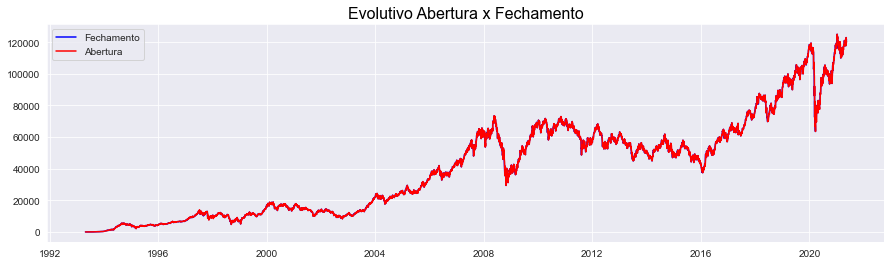

In [16]:
g1 = sns.lineplot(x=bvsp['date'], y=bvsp['close'], label='Fechamento', color='blue')
g1 = sns.lineplot(x=bvsp['date'], y=bvsp['open'], label='Abertura', color='red')
configuration(g1, title='Evolutivo Abertura x Fechamento', colors='black')

##### Alta e Baixa

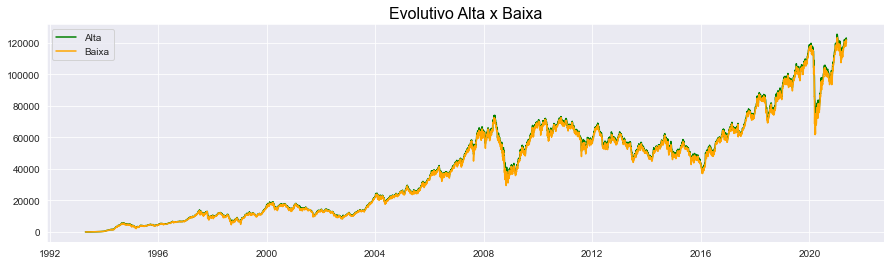

In [17]:
g2 = sns.lineplot(x=bvsp['date'], y=bvsp['high'], label='Alta', color='green')
g2 = sns.lineplot(x=bvsp['date'], y=bvsp['low'], label='Baixa', color='orange')
configuration(g2, title='Evolutivo Alta x Baixa', colors='black')

##### Volume

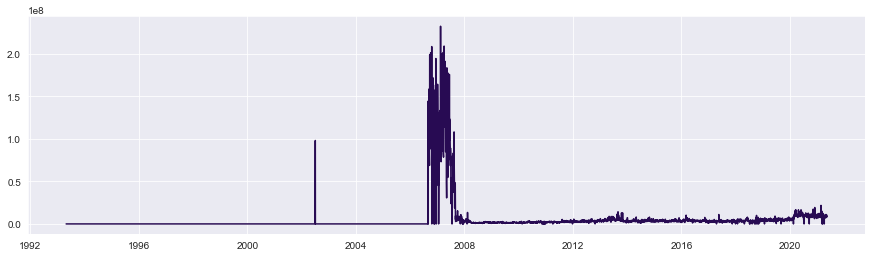

In [18]:
g3 = sns.lineplot(x=bvsp['date'], y=bvsp['volume'])
configuration(g3)

- valores de volume estão com problemas, por isso irei excluir da análise
- também essa variável não entrará no modelo

In [19]:
#excluir coluna volume
bvsp.drop(columns=['volume'], inplace=True)
bvsp.head()

,date,open,high,low,close,year,month,day
0,1993-04-27,24.799999,25.400000,24.500000,24.500000,1993,4,27
1,1993-04-28,24.500000,24.600000,23.700001,24.299999,1993,4,28
2,1993-04-29,24.299999,24.799999,23.700001,23.700001,1993,4,29
3,1993-04-30,23.700001,24.200001,23.700001,24.100000,1993,4,30
4,1993-05-03,24.100000,24.400000,23.799999,24.100000,1993,5,3


- o índice não apresenta estacionaridade, mas também apresenta diversos pontos de sazonalidade, principalmente indicados nos anos de 2008-9 (subprime) e 2020 (covid-19)
- é importante notar que na crise de 2020 o índice retornou a valores vistos em 2007 (de 120 mil a 60 mil pontos), mas a curva de retomada é maior do que a vista na crise de 2008
- importante avaliar a sazonaridade da série

#### Distribuição

<AxesSubplot:xlabel='high', ylabel='Density'>

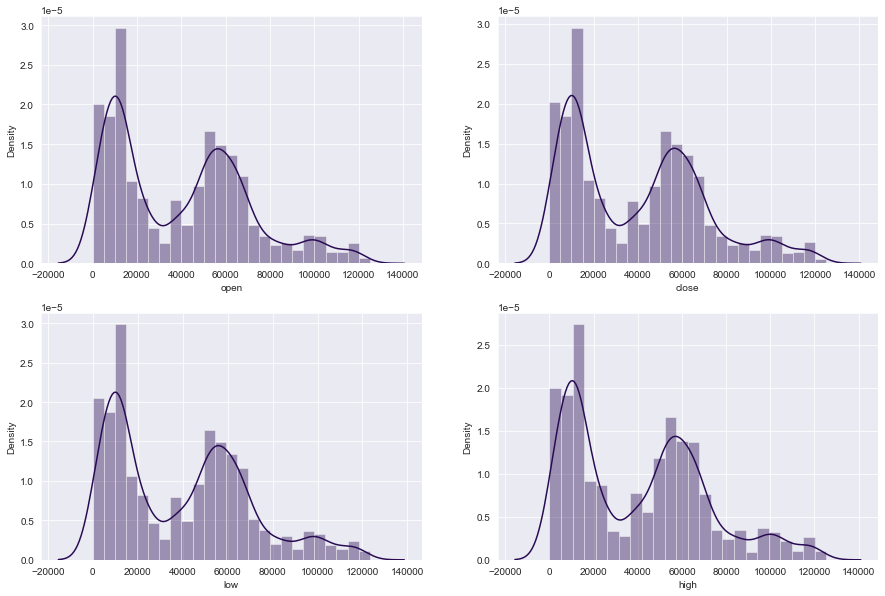

In [20]:
fig, axes = plt.pyplot.subplots(2,2, figsize=(15,10))
sns.distplot(bvsp['open'], ax=axes[0,0])
sns.distplot(bvsp['close'], ax=axes[0,1])
sns.distplot(bvsp['low'], ax=axes[1,0])
sns.distplot(bvsp['high'], ax=axes[1,1])

- as variáveis possuem comportamento similares
- não se comportam como uma normal, embora também não se possa afirmar que possuem uma assimetria a esquerda, uma vez que apresentam um vale entre dois picos

##### Correlação

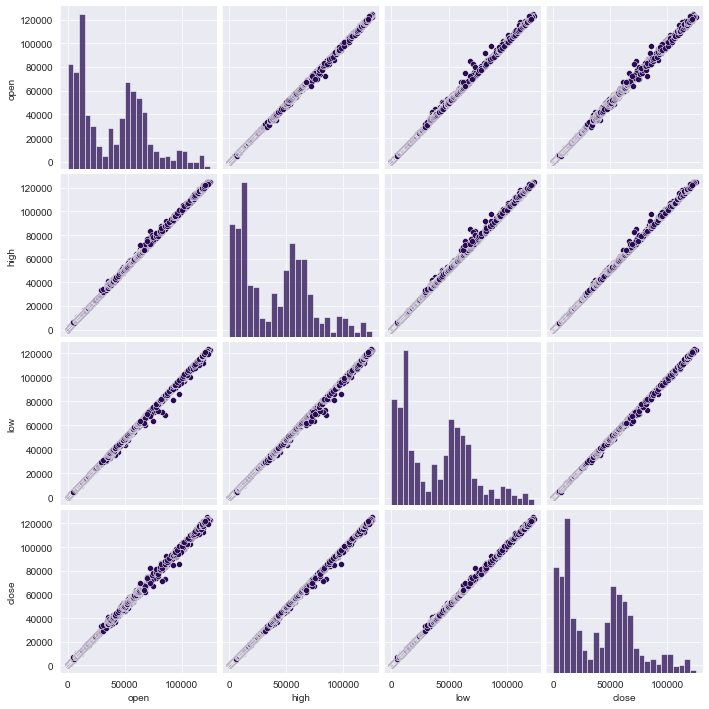

In [21]:
sns.pairplot(bvsp[['open', 'high', 'low', 'close']])

- como era de se esperar as variáveis possuem uma grande relação linear, sendo possível, portanto, prever um valor utilizando-se de outro

## Variação

- compreender como as variáveis target variam em relação à variável preditora

### Abertura x Fechamento

In [22]:
bvsp['var_close_abs'] = bvsp['close'] - bvsp['open']           # valores absolutos
bvsp['var_close_per'] = (bvsp['close'] / bvsp['open']) - 1     # variação em percentual
bvsp.sample(10)

,date,open,high,low,close,year,month,day,var_close_abs,var_close_per
5531,2014-12-23,50121.000000,50890.000000,49815.000000,50890.0,2014,12,23,769.000000,0.015343
2793,2004-01-09,23722.000000,24088.000000,23710.000000,23917.0,2004,1,9,195.000000,0.008220
6189,2017-08-21,68713.000000,69068.000000,68514.000000,68635.0,2017,8,21,-78.000000,-0.001135
373,1994-09-30,5442.600098,5597.000000,5441.899902,5484.0,1994,9,30,41.399902,0.007607
2079,2001-04-16,14974.000000,14976.000000,14385.000000,14445.0,2001,4,16,-529.000000,-0.035328
5541,2015-01-12,48840.000000,48840.000000,47956.000000,48140.0,2015,1,12,-700.000000,-0.014333
1897,2000-08-03,16248.000000,16761.000000,16073.000000,16721.0,2000,8,3,473.000000,0.029111
2869,2004-04-26,21588.000000,21778.000000,21286.000000,21324.0,2004,4,26,-264.000000,-0.012229
525,1995-05-02,3813.699951,3879.300049,3727.000000,3861.5,1995,5,2,47.800049,0.012534
6156,2017-07-05,63215.000000,63485.000000,62708.000000,63154.0,2017,7,5,-61.000000,-0.000965


#### Estatísticas descritivas

In [23]:
bvsp[['var_close_abs', 'var_close_per']].describe()

,var_close_abs,var_close_per
count,7116.000000,7116.000000
mean,13.210596,0.000961
std,828.710792,0.022430
min,-12520.000000,-0.157792
25%,-251.125000,-0.009995
50%,0.000000,0.000000
75%,300.000000,0.011818
max,10057.000000,0.338956


#### Variação negativa
objetivo é verificar a probabilidade de o valor de abertura ser inferior ao de fechamento e vice-versa

In [24]:
dias_negativos = bvsp['var_close_abs'] <= 0
print('Absoluto')
print(dias_negativos.value_counts())                 
print('')
print('Percentual')
print(dias_negativos.value_counts(normalize=True))   

Absoluto
True     3559
False    3557
Name: var_close_abs, dtype: int64

Percentual
True     0.500141
False    0.499859
Name: var_close_abs, dtype: float64


#### Análise gráfica

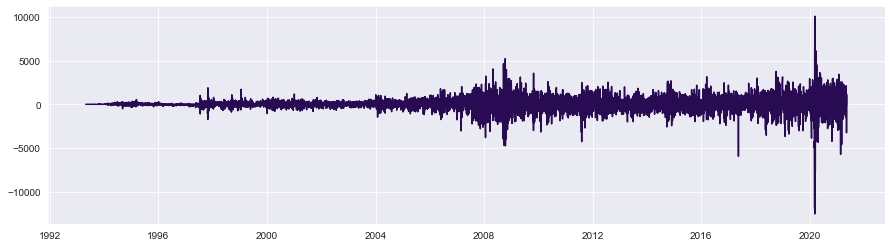

In [25]:
g4 = sns.lineplot(x=bvsp['date'], y=bvsp['var_close_abs'])
configuration(g4)

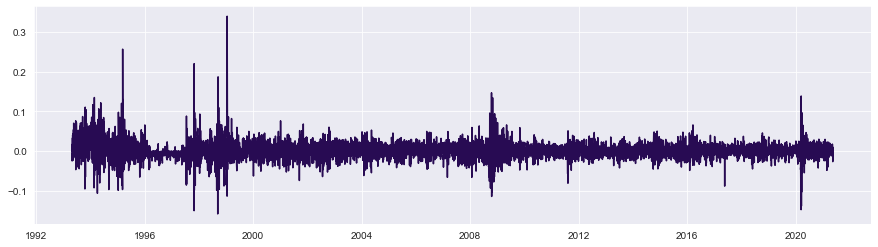

In [26]:
g5 = sns.lineplot(x=bvsp['date'], y=bvsp['var_close_per'])
configuration(g5)

#### Conclusões

- praticamente em metade dos dias o valor de fechamento é menor do que o de abertura

- o maior percentual de variação positiva é de 33% e de variação negativa é -15%

- pela análise gráfica se vê que a maior variação absoluta ocorreu no período da covid-19 em 2020, enquanto a maior variação percentual foi antes dos anos 2000, provavelmente em decorrência do menor valor do indicador

### Fechamento dia anterior x Abertura dia posterior

avaliar com que frequência o valor de abertura é igual ao de fechamento do dia anterior

**Prever abertura?**

In [27]:
#iterar para obter os dias em que o fechamento foi igual à abertura
contador = 0
verifica_igualdade = []
variacao = []
for i in range(bvsp.shape[0] - 1):
    if bvsp['close'][contador] == bvsp['open'][contador + 1]:      #compara o fechamento do dia anterior com a abertura do próximo
        verifica_igualdade.append('Igual')
    elif bvsp['close'][contador] > bvsp['open'][contador + 1]:
        verifica_igualdade.append('Fechamento (maior)')
    else:
        verifica_igualdade.append('Fechamento (menor)')
    diferenca = bvsp['close'][contador] - bvsp['open'][contador]                #calcula a diferença entre o fechamento e abertura
    variacao.append(diferenca)
    contador += 1

resultados = {
    'comparacao': verifica_igualdade,
    'variacao':variacao
}

fechamento_abertura = pd.DataFrame(data=resultados)

In [28]:
print('Total de dias que o fechamento foi igual a abertura do dia posterior')
print('')
print(fechamento_abertura['comparacao'].value_counts())
print('')
print(fechamento_abertura['comparacao'].value_counts(normalize=True))

Total de dias que o fechamento foi igual a abertura do dia posterior

Fechamento (menor)    3153
Igual                 2049
Fechamento (maior)    1913
Name: comparacao, dtype: int64

Fechamento (menor)    0.443148
Igual                 0.287983
Fechamento (maior)    0.268869
Name: comparacao, dtype: float64


In [29]:
fechamento_abertura['variacao'].describe()

count     7115.000000
mean        13.049136
std        828.657093
min     -12520.000000
25%       -251.250000
50%          0.000000
75%        300.000000
max      10057.000000
Name: variacao, dtype: float64

- o valor de abertura é igual ao de fechamento em apenas 28% das observações, sendo que em 44% das vezes o fechamento é menor do que o valor de abertura

- embora a maior probabilidade é que haja uma variação entre os valores, essa variação não tende ser grande (observando a média) nem uniforme (observando o desvio padrão)

**Conclusão:** aparentemente não é viável utilizar o fechamento do dia anterior para prever a próxima abertura

### Abertura x Baixa

In [30]:
bvsp['var_low_abs'] = bvsp['low'] - bvsp['open']           # valores absolutos
bvsp['var_low_per'] = (bvsp['low'] / bvsp['open']) - 1     # variação em percentual
bvsp.sample(10)

,date,open,high,low,close,year,month,day,var_close_abs,var_close_per,var_low_abs,var_low_per
6310,2018-02-07,83894.000000,84410.000000,82548.000000,82767.000000,2018,2,7,-1127.000000,-0.013434,-1346.0,-0.016044
363,1994-09-16,5287.500000,5423.500000,5225.000000,5293.700195,1994,9,16,6.200195,0.001173,-62.5,-0.011820
2582,2003-03-20,10993.000000,11174.000000,10858.000000,11159.000000,2003,3,20,166.000000,0.015101,-135.0,-0.012281
5261,2013-11-21,53027.000000,53027.000000,52190.000000,52688.000000,2013,11,21,-339.000000,-0.006393,-837.0,-0.015784
1422,1998-10-08,6157.000000,6195.000000,5878.000000,6175.000000,1998,10,8,18.000000,0.002924,-279.0,-0.045314
1486,1999-01-06,7111.000000,7334.000000,7110.000000,7331.000000,1999,1,6,220.000000,0.030938,-1.0,-0.000141
54,1993-07-12,58.799999,60.599998,58.799999,59.700001,1993,7,12,0.900002,0.015306,0.0,0.000000
5614,2015-04-29,55809.000000,55809.000000,55067.000000,55325.000000,2015,4,29,-484.000000,-0.008672,-742.0,-0.013295
2690,2003-08-19,14147.000000,14236.000000,14091.000000,14158.000000,2003,8,19,11.000000,0.000778,-56.0,-0.003958
1979,2000-11-27,14340.000000,14495.000000,13941.000000,14008.000000,2000,11,27,-332.000000,-0.023152,-399.0,-0.027824


#### Estatísticas descritivas

In [31]:
bvsp[['var_low_abs', 'var_low_per']].describe()

,var_low_abs,var_low_per
count,7116.000000,7116.000000
mean,-427.359079,-0.012606
std,698.468910,0.015411
min,-16615.000000,-0.195234
25%,-565.250000,-0.017622
50%,-195.000000,-0.008694
75%,-17.975037,-0.001242
max,0.000000,0.000000


#### Variação negativa
objetivo é verificar a probabilidade da abertura ser igual ao valor da baixa

(**todas as vezes em que a variação entre o valor de abertura e a baixa for igual a zero, significa que o valor de abertura foi igual ao valor de baixa**)

In [32]:
abertura_igual_baixa = bvsp['var_low_abs'] == 0 
print('Absoluto')
print(abertura_igual_baixa.value_counts())
print('')
print('Percentual')
print(abertura_igual_baixa.value_counts(normalize=True))

Absoluto
False    5764
True     1352
Name: var_low_abs, dtype: int64

Percentual
False    0.810006
True     0.189994
Name: var_low_abs, dtype: float64


#### Análise gráfica

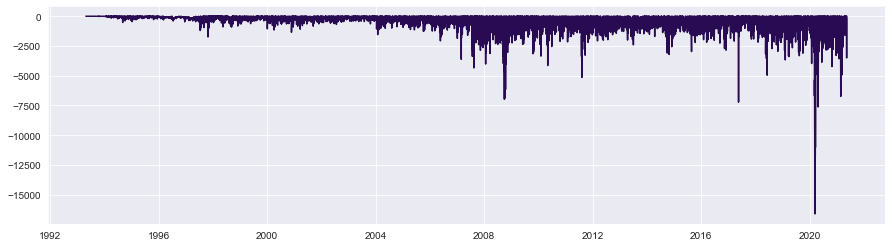

In [33]:
g6 = sns.lineplot(x=bvsp['date'], y=bvsp['var_low_abs'])
configuration(g6)

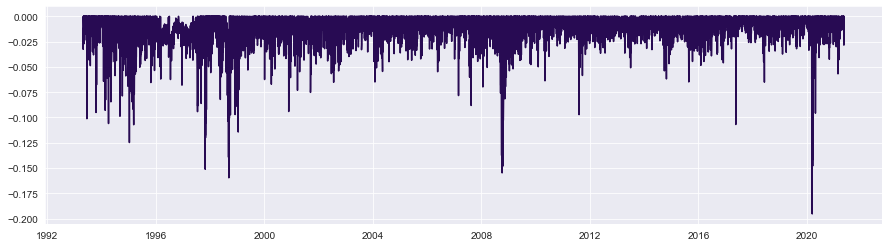

In [34]:
g7 = sns.lineplot(x=bvsp['date'], y=bvsp['var_low_per'])
configuration(g7)

- a maior variação negativa entre o preço de abertura e a baixa é de 19% em um único dia, sendo esse valor em média 1% (ou seja, em média, todos os dias a baixa é 1% menor que a abertura

- em apenas 18% dos dias obvervados o valor da baixa foi o mesmo da abertura ("dias de otimismo"?)

- em períodos de crise econômica a variação é maior devido à volatilidade do mercado

**penso que os dados de treino devem ir até o primeiro semestre de 2020 para contemplar todas as possibilidades de variação**

### Abertura x Alta

In [35]:
bvsp['var_high_abs'] = bvsp['high'] - bvsp['open']
bvsp['var_high_per'] =(bvsp['high'] / bvsp['open']) - 1
bvsp.sample(10)

,date,open,high,low,close,year,month,day,var_close_abs,var_close_per,var_low_abs,var_low_per,var_high_abs,var_high_per
3736,2007-09-21,56919.000000,57899.000000,56919.000000,57799.000000,2007,9,21,880.000000,0.015461,0.000000,0.000000,980.000000,0.017217
1506,1999-02-03,8828.000000,8898.000000,8586.000000,8676.000000,1999,2,3,-152.000000,-0.017218,-242.000000,-0.027413,70.000000,0.007929
2840,2004-03-16,21234.000000,21647.000000,21234.000000,21613.000000,2004,3,16,379.000000,0.017849,0.000000,0.000000,413.000000,0.019450
4679,2011-07-18,59479.000000,59479.000000,58631.000000,58838.000000,2011,7,18,-641.000000,-0.010777,-848.000000,-0.014257,0.000000,0.000000
3656,2007-05-29,52121.000000,52545.000000,51271.000000,51713.000000,2007,5,29,-408.000000,-0.007828,-850.000000,-0.016308,424.000000,0.008135
512,1995-04-13,3017.800049,3030.899902,2897.399902,3020.800049,1995,4,13,3.000000,0.000994,-120.400147,-0.039897,13.099853,0.004341
2902,2004-06-10,20269.000000,20298.000000,19797.000000,19865.000000,2004,6,10,-404.000000,-0.019932,-472.000000,-0.023287,29.000000,0.001431
179,1994-01-03,375.500000,380.100006,373.399994,380.100006,1994,1,3,4.600006,0.012250,-2.100006,-0.005593,4.600006,0.012250
5166,2013-07-08,45211.000000,45740.000000,44839.000000,45076.000000,2013,7,8,-135.000000,-0.002986,-372.000000,-0.008228,529.000000,0.011701
6079,2017-03-15,64702.000000,66318.000000,64537.000000,66235.000000,2017,3,15,1533.000000,0.023693,-165.000000,-0.002550,1616.000000,0.024976


#### Estatísticas Descritivas

In [36]:
bvsp[['var_high_abs', 'var_high_per']].describe()

,var_high_abs,var_high_per
count,7116.000000,7116.000000
mean,426.986060,0.013034
std,596.791119,0.016263
min,0.000000,0.000000
25%,29.000000,0.002089
50%,225.000000,0.009036
75%,578.000000,0.017898
max,11137.000000,0.345902


#### Variação negativa

o objetivo é verificar quando o valor máximo foi igual ao de abertura

(**todas as vezes em que a variação entre o valor de abertura e a alta for igual a zero, significa que o valor de abertura foi igual ao valor de alta**)

In [37]:
abertura_igual_alta = bvsp['var_high_abs'] == 0
print('Absoluto')
print(abertura_igual_alta.value_counts())
print('')
print('Percentual')
print(abertura_igual_alta.value_counts(normalize=True))

Absoluto
False    5876
True     1240
Name: var_high_abs, dtype: int64

Percentual
False    0.825745
True     0.174255
Name: var_high_abs, dtype: float64


#### Análise gráfica

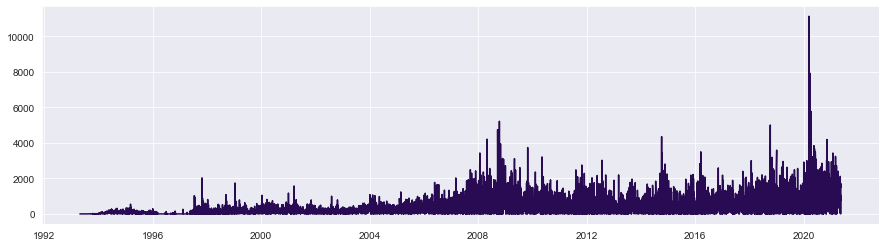

In [38]:
g8 = sns.lineplot(x=bvsp['date'], y=bvsp['var_high_abs'])
configuration(g8)

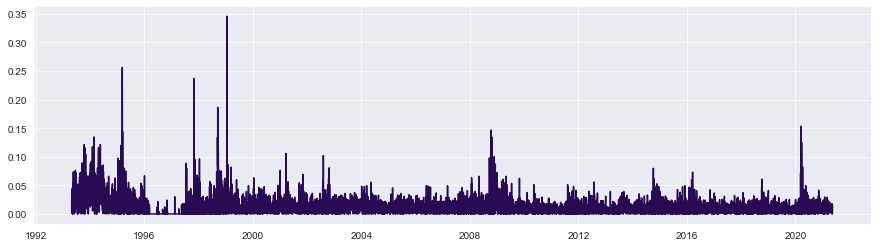

In [39]:
g9 = sns.lineplot(x=bvsp['date'], y=bvsp['var_high_per'])
configuration(g9)

- a maior variação entre o preço de abertura e a alta foi de 34% em um único dia, sendo esse valor em média 1% (ou seja, em média, todos os dias a alta é 1% maior que a abertura

- em apenas 17% dos dias obvervados o valor da alta foi igual ao da abertura ("dias de pessimismo"?)

- o mesmo pode ser observado com a comparação entre baixa e al: em períodos de crise econômica a variação é maior devido à volatilidade do mercado

### Observações para a modelagem e o modelo

#### Baseline

Acho que um baseline que considere as médias dos comparativos é um bom parâmetro para a alta e a baixa:

    - baseline = 1% positivo para alta e 1% negativo para a baixa

Como a média da variação entre a abertura e fechamento é próxima de zero, acredito que uma média móvel seja o melhor indicador para um base line:

    - baseline = média móvel 5 dias para fechamento

#### Modelagem

Considerarei os dados de treino até o primeiro semestre de 2020, pois assim consigo fazer o modelo aprender as maiores variações no indicador.

    - posso considerar, embora acredito não ser viável, uma NORMALIZAÇÃO dos dados para aumentar a estabilidade das previsões
    - também é possível considerar uma VALIDAÇÃO CRUZADA dos dados, embora eu ache estranho usar validação em uma regressão

#### Algoritmos

Por visualizar uma **RELAÇÃO LINEAR** entre as variáveis dependentes e independentes, acredito que sejam os modelos lineares os mais indicados

Como a curva evolutiva do dado tem uma acentuação considerável após 2006, também é importante considerar os modelos **POLINOMIAIS**

# ÁREA DE PREVISÕES

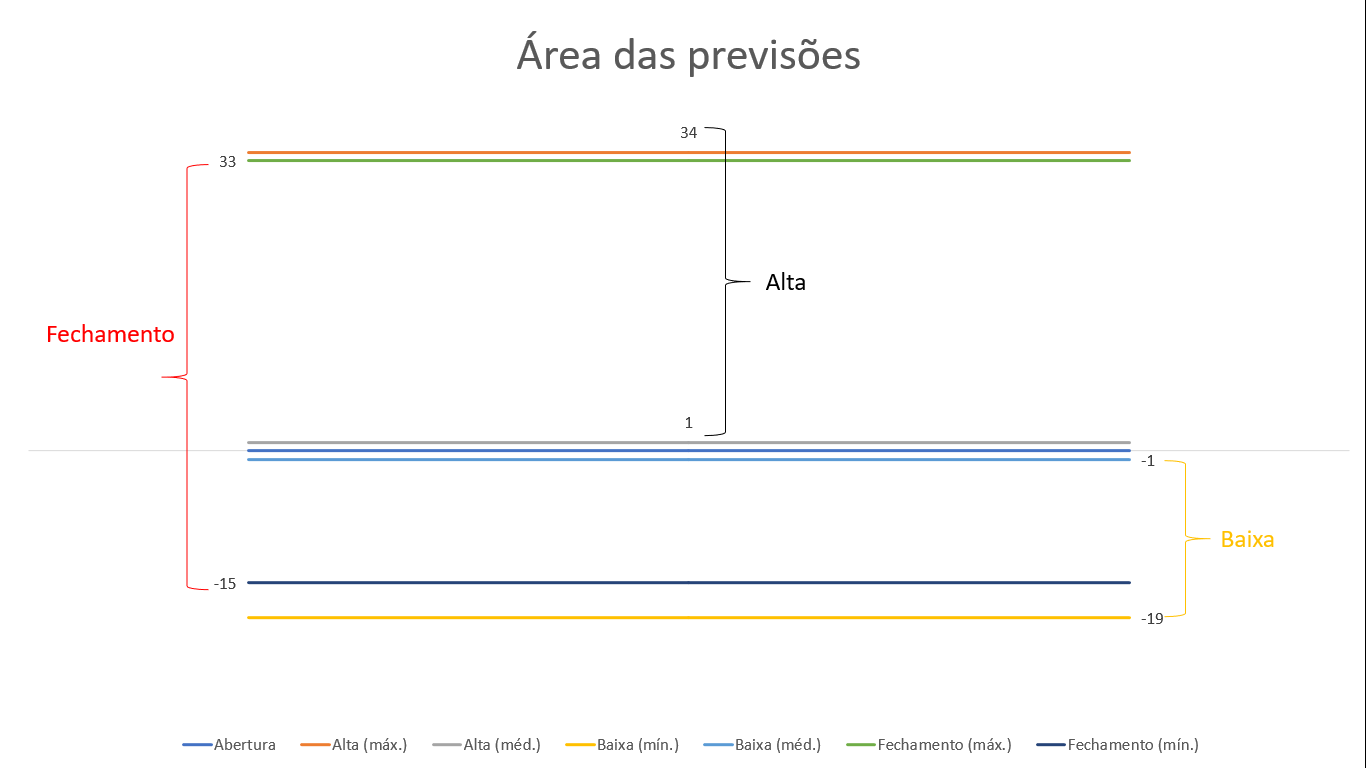

In [40]:
Image(filename='area_previsoes.png')

## Salvar arquivo para a modelagem

In [41]:
novo_bvsp = bvsp[['date','open','high','low','close']]
novo_bvsp.to_csv('bvsp_novo.csv', index=False)